### DESAFIO ANALISIS DE DATOS: TIENDAS

El objetivo es analizar las tiendas para determinar cuales son las mas rentables en base a los siguientes criterios:
1. Ingresos
2. Califación media por parte  de los clientes
3. Volumen de ventas por categoría


### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Estimación del ingreso Bruto para cada tienda a través de su variable Precio:

In [ ]:
suma_tienda1 = tienda['Precio'].sum()
print(f"Suma de 'Precio' para tienda 1: {suma_tienda1}")

suma_tienda2 = tienda2['Precio'].sum()
print(f"Suma de 'Precio' para tienda 2: {suma_tienda2}")

suma_tienda3 = tienda3['Precio'].sum()
print(f"Suma de 'Precio' para tienda 3: {suma_tienda3}")

suma_tienda4 = tienda4['Precio'].sum()
print(f"Suma de 'Precio' para tienda 4: {suma_tienda4}")



Suma de 'Precio' para tienda 1: 1150880400.0
Suma de 'Precio' para tienda 2: 1116343500.0
Suma de 'Precio' para tienda 3: 1098019600.0
Suma de 'Precio' para tienda 4: 1038375700.0


/tmp/ipython-input-4011708454.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Ingreso Bruto', data=ingreso_bruto_por_tienda, palette='viridis')


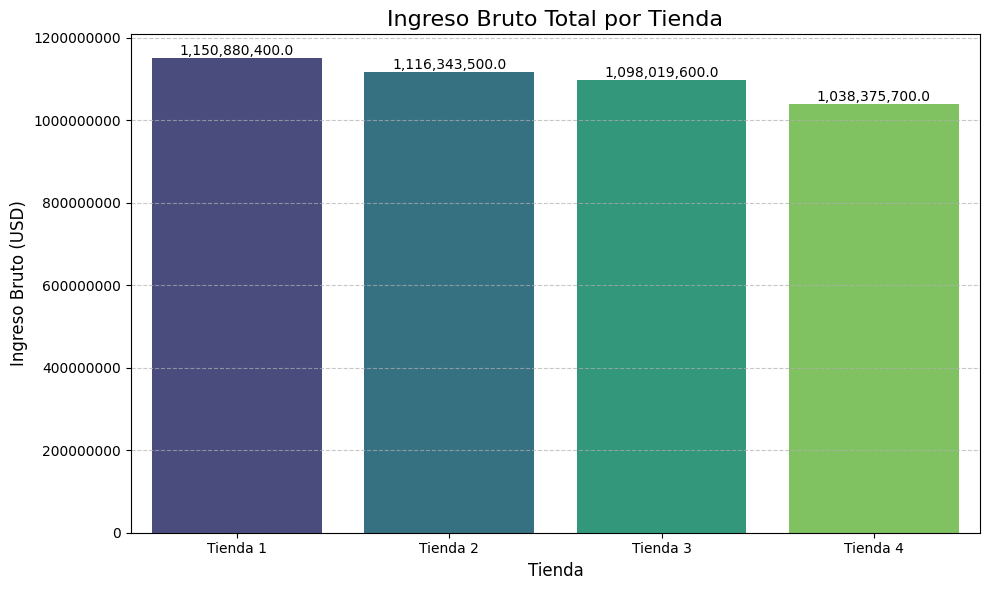

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the sum variables
ingreso_bruto_por_tienda = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Bruto': [suma_tienda1, suma_tienda2, suma_tienda3, suma_tienda4]
})

# Find the store with the highest income for highlighting
max_income_store = ingreso_bruto_por_tienda.loc[ingreso_bruto_por_tienda['Ingreso Bruto'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Ingreso Bruto', data=ingreso_bruto_por_tienda, palette='viridis')

# Add titles and labels
plt.title('Ingreso Bruto Total por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Bruto (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y') # Avoid scientific notation for y-axis

# Add value labels on top of the bars
for index, row in ingreso_bruto_por_tienda.iterrows():
    plt.text(index, row['Ingreso Bruto'], f'{row['Ingreso Bruto']:,}', color='black', ha="center", va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


La tienda 1 y 2 son las mas rentables en base al ingreso.

# 2. Ventas por categoría

### Ventas por categoría a nivel agregado

In [3]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

all_stores_ratings = pd.concat([tienda, tienda2, tienda3, tienda4])

ventas_categoría = all_stores_ratings.groupby('Categoría del Producto')['Producto'].count().reset_index()
ventas_categoría.columns = ['Categoría', 'Total Ventas']

# Ordenar por 'Total Ventas' de mayor a menor
ventas_categoría = ventas_categoría.sort_values(by='Total Ventas', ascending=False)

display(ventas_categoría)

,Categoría,Total Ventas
7,Muebles,1886
3,Electrónicos,1772
5,Juguetes,1290
2,Electrodomésticos,1149
1,Deportes y diversión,1113
4,Instrumentos musicales,753
6,Libros,742
0,Artículos para el hogar,730


A nivel agregado el producto mas vendido son los muebles y luego los electronicos.

## Ventas por tienda

In [ ]:
ventas_por_categoria_por_tienda = all_stores_ratings.groupby(['Tienda', 'Categoría del Producto'])['Producto'].count().reset_index()
ventas_por_categoria_por_tienda.columns = ['Tienda', 'Categoría del Producto', 'Total Ventas']
display(ventas_por_categoria_por_tienda)

In [ ]:
ventas_por_tienda_pivot = ventas_por_categoria_por_tienda.pivot_table(index='Categoría del Producto', columns='Tienda', values='Total Ventas', fill_value=0)
display(ventas_por_tienda_pivot)

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171.0,181.0,177.0,201.0
Deportes y diversión,284.0,275.0,277.0,277.0
Electrodomésticos,312.0,305.0,278.0,254.0
Electrónicos,448.0,422.0,451.0,451.0
Instrumentos musicales,182.0,224.0,177.0,170.0
Juguetes,324.0,313.0,315.0,338.0
Libros,173.0,197.0,185.0,187.0
Muebles,465.0,442.0,499.0,480.0


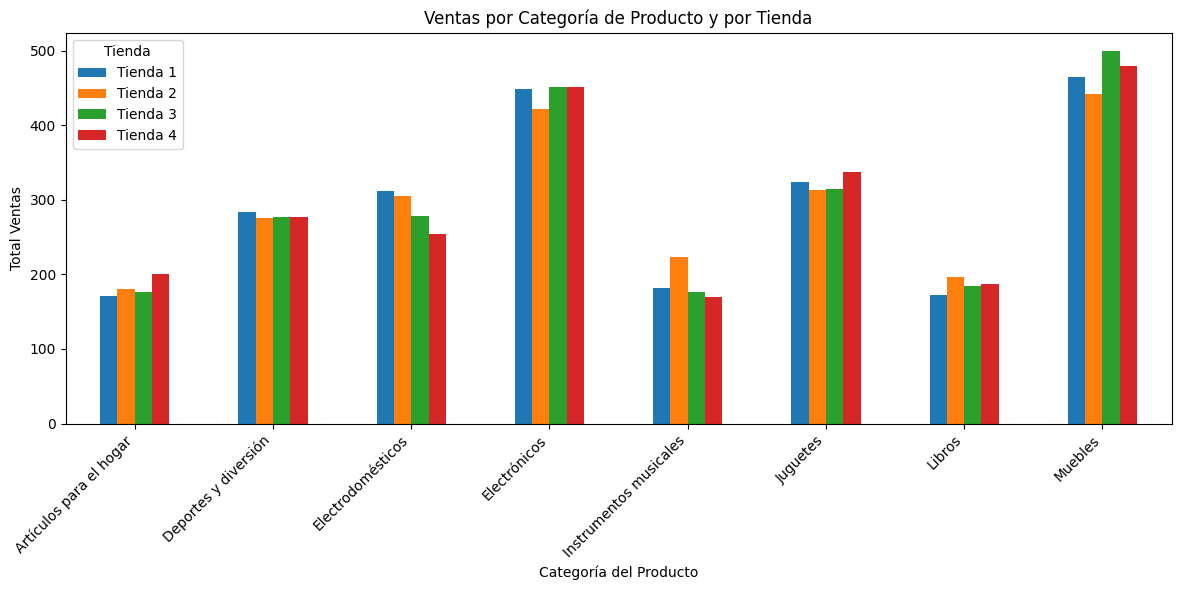

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
ventas_por_tienda_pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas por Categoría de Producto y por Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Total Ventas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

all_stores_ratings = pd.concat([tienda, tienda2, tienda3, tienda4])

average_rating_by_store = all_stores_ratings.groupby('Tienda')['Calificación'].mean().reset_index()
average_rating_by_store.columns = ['Tienda', 'Calificación Promedio']

display(average_rating_by_store)

,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


La tienda 3 presenta la mejor calificacion y luego la tienda 2.

# 4. Productos más y menos vendidos

In [ ]:
ventas_por_producto_por_tienda = all_stores_ratings.groupby(['Tienda', 'Producto'])['Producto'].count().reset_index(name='Total Ventas')
productos_mas_vendidos_por_tienda = ventas_por_producto_por_tienda.sort_values(by=['Tienda', 'Total Ventas'], ascending=[True, False])

# Obtener el producto más vendido para cada tienda
productos_mas_vendidos = productos_mas_vendidos_por_tienda.groupby('Tienda').first().reset_index()

display(productos_mas_vendidos)

,Tienda,Producto,Total Ventas
0,Tienda 1,Armario,60
1,Tienda 2,Iniciando en programación,65
2,Tienda 3,Kit de bancas,57
3,Tienda 4,Cama box,62


In [ ]:
ventas_por_producto_por_tienda = all_stores_ratings.groupby(['Tienda', 'Producto'])['Producto'].count().reset_index(name='Total Ventas')
productos_menos_vendidos_por_tienda = ventas_por_producto_por_tienda.sort_values(by=['Tienda', 'Total Ventas'], ascending=[True, True])

# Obtener el producto menos vendido para cada tienda
productos_menos_vendidos = productos_menos_vendidos_por_tienda.groupby('Tienda').first().reset_index()

display(productos_menos_vendidos)

,Tienda,Producto,Total Ventas
0,Tienda 1,Auriculares con micrófono,33
1,Tienda 2,Juego de mesa,32
2,Tienda 3,Bloques de construcción,35
3,Tienda 4,Guitarra eléctrica,33


# 5. Envío promedio por tienda

In [ ]:
costo_envio_promedio_por_tienda = all_stores_ratings.groupby('Tienda')['Costo de envío'].mean().reset_index()
costo_envio_promedio_por_tienda.columns = ['Tienda', 'Costo de Envío Promedio']

display(costo_envio_promedio_por_tienda)

,Tienda,Costo de Envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


In [ ]:


# Unir los DataFrames por la columna 'Tienda'
tabla_cruzada_envio_calificacion = pd.merge(
    costo_envio_promedio_por_tienda,
    average_rating_by_store,
    on='Tienda'
)

# Mostrar la tabla cruzada
display(tabla_cruzada_envio_calificacion)

,Tienda,Costo de Envío Promedio,Calificación Promedio
0,Tienda 1,26018.609580,3.976685
1,Tienda 2,25216.235693,4.037304
2,Tienda 3,24805.680373,4.048326
3,Tienda 4,23459.457167,3.995759


In [ ]:
# Ordenar la tabla por 'Calificación Promedio' de mayor a menor
tabla_cruzada_ordenada_por_calificacion = tabla_cruzada_envio_calificacion.sort_values(by='Calificación Promedio', ascending=False)

# Mostrar la tabla ordenada
display(tabla_cruzada_ordenada_por_calificacion)

,Tienda,Costo de Envío Promedio,Calificación Promedio
2,Tienda 3,24805.680373,4.048326
1,Tienda 2,25216.235693,4.037304
3,Tienda 4,23459.457167,3.995759
0,Tienda 1,26018.609580,3.976685


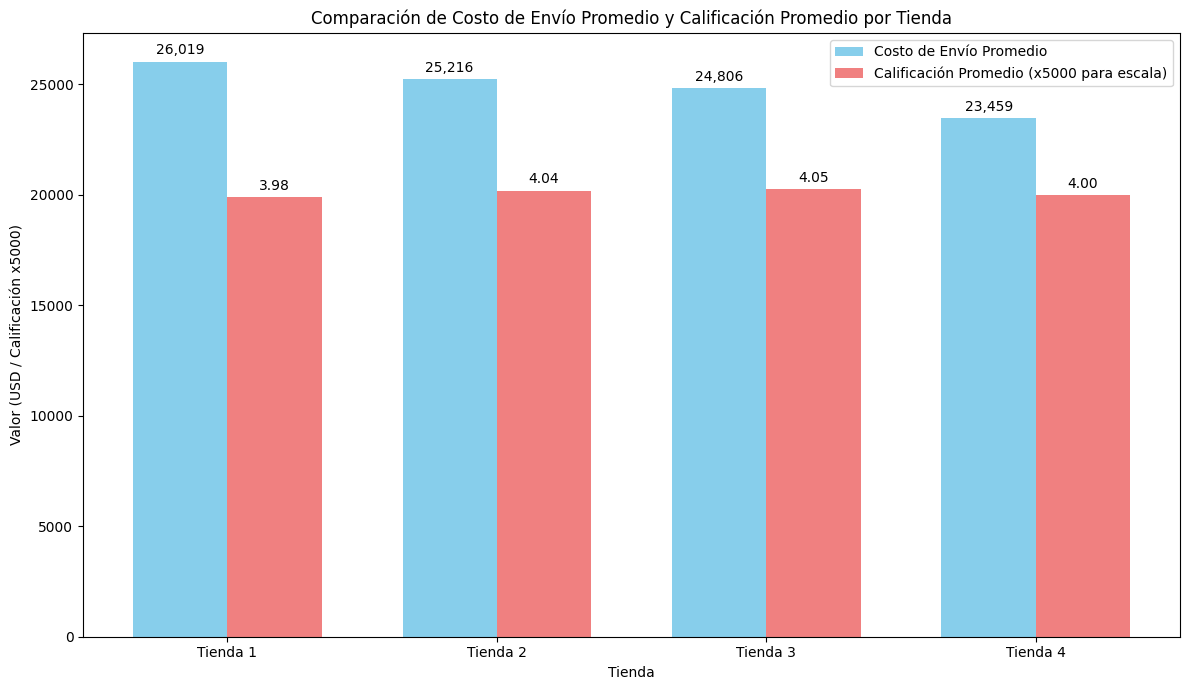

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare data for plotting
labels = tabla_cruzada_envio_calificacion['Tienda']
costo_envio = tabla_cruzada_envio_calificacion['Costo de Envío Promedio']
calificacion = tabla_cruzada_envio_calificacion['Calificación Promedio']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, costo_envio, width, label='Costo de Envío Promedio', color='skyblue')
rects2 = ax.bar(x + width/2, calificacion * 5000, width, label='Calificación Promedio (x5000 para escala)', color='lightcoral') # Multiply rating to make it visible on the same scale as cost

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Valor (USD / Calificación x5000)')
ax.set_xlabel('Tienda')
ax.set_title('Comparación de Costo de Envío Promedio y Calificación Promedio por Tienda')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels on the bars
def autolabel(rects, is_rating=False):
    for rect in rects:
        height = rect.get_height()
        if is_rating:
            ax.annotate(f'{height/5000:.2f}', # Divide by 5000 to show actual rating
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
        else:
            ax.annotate(f'{height:,.0f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2, is_rating=True)

fig.tight_layout()
plt.show()

### Conclusión

En base al análisis se observa que la tienda 1 es la que presenta mayores ingresos seguida por la tienda 2.
Respecto a la califcación promedio se observa que la nota más alta tiene la tienda 3 seguida por la tienda 2.

**La tienda 2**, presenta el ingreso y la calificación media alta en comparación a las otras tiendas.
